In [2]:
import stream as st
import scanpy
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import os
from pandas.plotting import table 
st.__version__

/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.1'

In [3]:
# Set figure parameters
st.set_figure_params(dpi=80,style='white',figsize=[5.4,4.8],
                     rc={'image.cmap': 'viridis'})

### Generate new stream object

#### Read in data, preprocess

In [4]:
## Set analysis name- for reading/writing data
analysis_name="cd8_nsclc_downsample"

## Load h5ad object (from seurat)
filename="analysis/STREAM/" + analysis_name + ".h5ad"
adata = scanpy.read_h5ad(filename)
st.set_workdir(adata,'./stream_result')

## Make variable names unique
adata.var_names_make_unique()

## Convert to array
adata.X=adata.X.toarray()

## Calculate QC metrics
st.cal_qc(adata,assay='rna')

###Remove mitochondrial genes 
st.remove_mt_genes(adata)

Saving results in: ./stream_result


In [5]:
adata.obs.head()

,orig.ident,nCount_RNA,nFeature_RNA,sample,RNA_snn_res.0.8,seurat_clusters,Cell.ID,patient,majorCluster,tissueType,cellType,majorCluster_annot,age_numeric,sex,n_counts,n_genes,pct_genes,pct_mt
TTC108-1010,0,999931.485414,3479,P1010,6,6,TTC108-1010,P1010,CD8_C5-ZNF683,T,C,5,78.0,F,6339.265202,1889,0.080830,0
TTC3-0729,0,999827.324628,1760,P0729,0,0,TTC3-0729,P0729,CD8_C3-CX3CR1,T,C,3,57.0,F,4472.465255,1300,0.055627,0
NTC68-0729,0,999522.031461,1767,P0729,2,2,NTC68-0729,P0729,CD8_C5-ZNF683,N,C,5,57.0,F,4504.756406,1254,0.053659,0
TTC131-1010,0,999990.095022,3505,P1010,1,1,TTC131-1010,P1010,CD8_C4-GZMK,T,C,4,78.0,F,6046.145597,1760,0.075310,0
TTC251-0913,0,999895.202520,5302,P0913,10,10,TTC251-0913,P0913,CD8_C6-LAYN,T,C,6,70.0,M,9966.293198,3500,0.149765,0


#### Feature selection

/Users/jlabelle/opt/anaconda3/envs/env_stream_1.1/lib/python3.7/site-packages/statsmodels/nonparametric/smoothers_lowess.py:228: RuntimeWarning: invalid value encountered in true_divide
  frac=frac, it=it, delta=delta, given_xvals=False)


1169 variable genes are selected


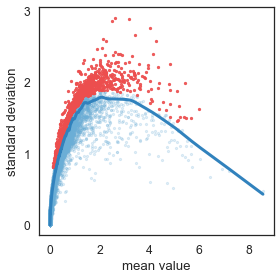

In [6]:
## If curve doesn't fit - lower loess_frac
st.select_variable_genes(adata,loess_frac=0.01,percentile=95)

**Alternatively, user can also select top  principal components using all genes or variable genes:**
- use all genes   
`st.select_top_principal_components(adata,n_pc=15,first_pc=True)`
- use variable genes   
    - users need to first run `st.select_variable_genes(adata,loess_frac=0.01, n_genes=2000)`  
    - `st.select_top_principal_components(adata,feature='var_genes',n_pc=40,first_pc=True)`

#### Dimension reduction and Trajectory
epg_alpha, epg_mu, epg_lambda are the three most influential parameters for learning elastic principal graph.

epg_alpha: penalizes spurious branching events. The larger, the fewer branches the function will learn. (by default, epg_alpha=0.02)

epg_mu: penalizes the deviation from harmonic embedding, where harmonicity assumes that each node is the mean of its neighbor nodes. The larger, the more edges the function will use to fit into points(cells) (by default, epg_mu=0.1)

epg_lambda: penalizes the total length of edges. The larger, the 'shorter' curves the function will use to fit into points(cells) and the fewer points(cells) the curves will reach. (by default, epg_lambda=0.02)

In [7]:
?st.dimension_reduction

In [6]:
## Dimension reduction
st.dimension_reduction(adata,method='se',feature='var_genes',n_components=2,n_neighbors=15,n_jobs=4)

## Trajectory inference
st.seed_elastic_principal_graph(adata,n_clusters=10)
st.elastic_principal_graph(adata,epg_alpha=0.02,epg_mu=0.05,epg_lambda=0.05)

## Optional: Extend leaf branch to reach further cells 
st.extend_elastic_principal_graph(adata, epg_ext_mode='WeigthedCentroid',epg_ext_par=0.8)

feature var_genes is being used ...
4 cpus are being used ...
Seeding initial elastic principal graph...
Clustering...
K-Means clustering ...
The number of initial nodes is 10
Calculatng minimum spanning tree...
Number of initial branches: 3
Learning elastic principal graph...
[1]
 "Constructing tree 1 of 1 / Subset 1 of 1"


[1]
 "Computing EPG with 50 nodes on 1156 points and 2 dimensions"


[1]
 "Using a single core"


Nodes = 
10
 
11
 
12
 
13
 
14
 
15
 
16
 
17
 
18
 
19
 
20
 
21
 
22
 
23
 
24
 
25
 
26
 
27
 
28
 
29
 
30
 
31
 
32
 
33
 
34
 
35
 
36
 
37
 
38
 
39
 
40
 
41
 
42
 
43
 
44
 
45
 
46
 
47
 
48
 
49
 


BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

1||50
	
5.082e-06
	
50
	
49
	
46
	
1
	
0
	
0
	
2.34e-06
	
2.268e-06
	
0.9808
	
0.9814
	
2.59e-06
	
1.514e-07
	
7.572e-06
	
0.0003786
	
0


8.588 sec elapsed

[[1]]



Number of branches after learning elastic principal graph: 3
Extending leaves with additional nodes ..

#### Identify markers

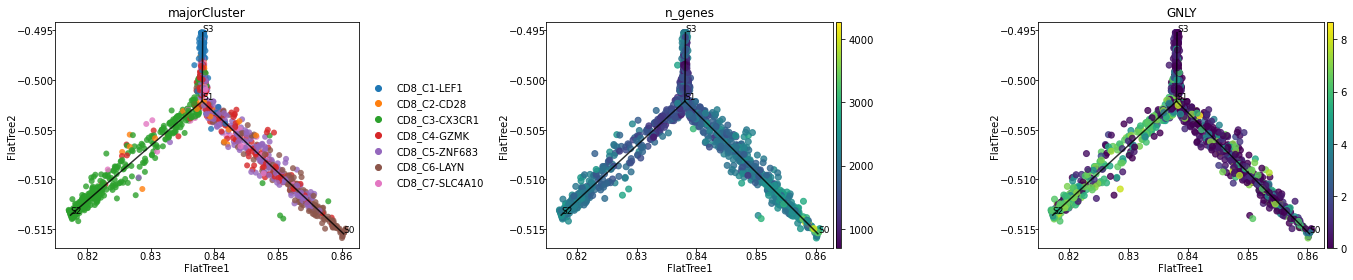

In [8]:
## Quick plot to determine root node
to_plot=['majorCluster','n_genes', "GNLY"]
st.plot_flat_tree(adata,color=to_plot,
                  dist_scale=0.5,show_graph=True,show_text=True)
root=None

In [138]:
## Detect leaf branch markers
st.detect_leaf_markers(adata,marker_list=adata.uns['var_genes'],
                       cutoff_zscore=1.0,cutoff_pvalue=0.01,
                       n_jobs=4)

Scanning the specified marker list ...
Filtering out markers that are expressed in less than 5 cells ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/pandas/core/frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


4 cpus are being used ...
1123 markers are being scanned ...


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/stream/core.py:3826: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_marker_detection['bfs_edges'] = df_marker_detection['branch_id']


There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough leaf branches
There are not enough

In [139]:
## Detect transition markers for each branch
st.detect_transition_markers(adata,marker_list=adata.uns['var_genes'],
                             cutoff_spearman=0.4,cutoff_logfc=0,
                             n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
1123 markers are being scanned ...


In [106]:
## Detect genes DE between pairs of branches
st.detect_de_markers(adata,marker_list=adata.uns['var_genes'],
                     cutoff_zscore=1,cutoff_logfc=0.25,
                     n_jobs=4)

Scanning the specified marker list ...
Importing precomputed scaled marker expression matrix ...
1123 markers are being scanned ...


#### Save output

In [9]:
filename='stream_result_' + analysis_name + '.pkl'
st.write(adata,file_name=filename)

### Read stream results back in + plot

In [29]:
## Load back in an analysis and create a new directory for figures
analysis_name = "cd8_nsclc_cyto"
adata=st.read('./stream_result/stream_result_' + analysis_name + '.pkl')
figure_dir="figures/STREAM/" + analysis_name
if not os.path.isdir(figure_dir):
    os.mkdir(figure_dir)

Working directory is already specified as './stream_result' 
To change working directory, please run set_workdir(adata,workdir=new_directory)


#### Plots

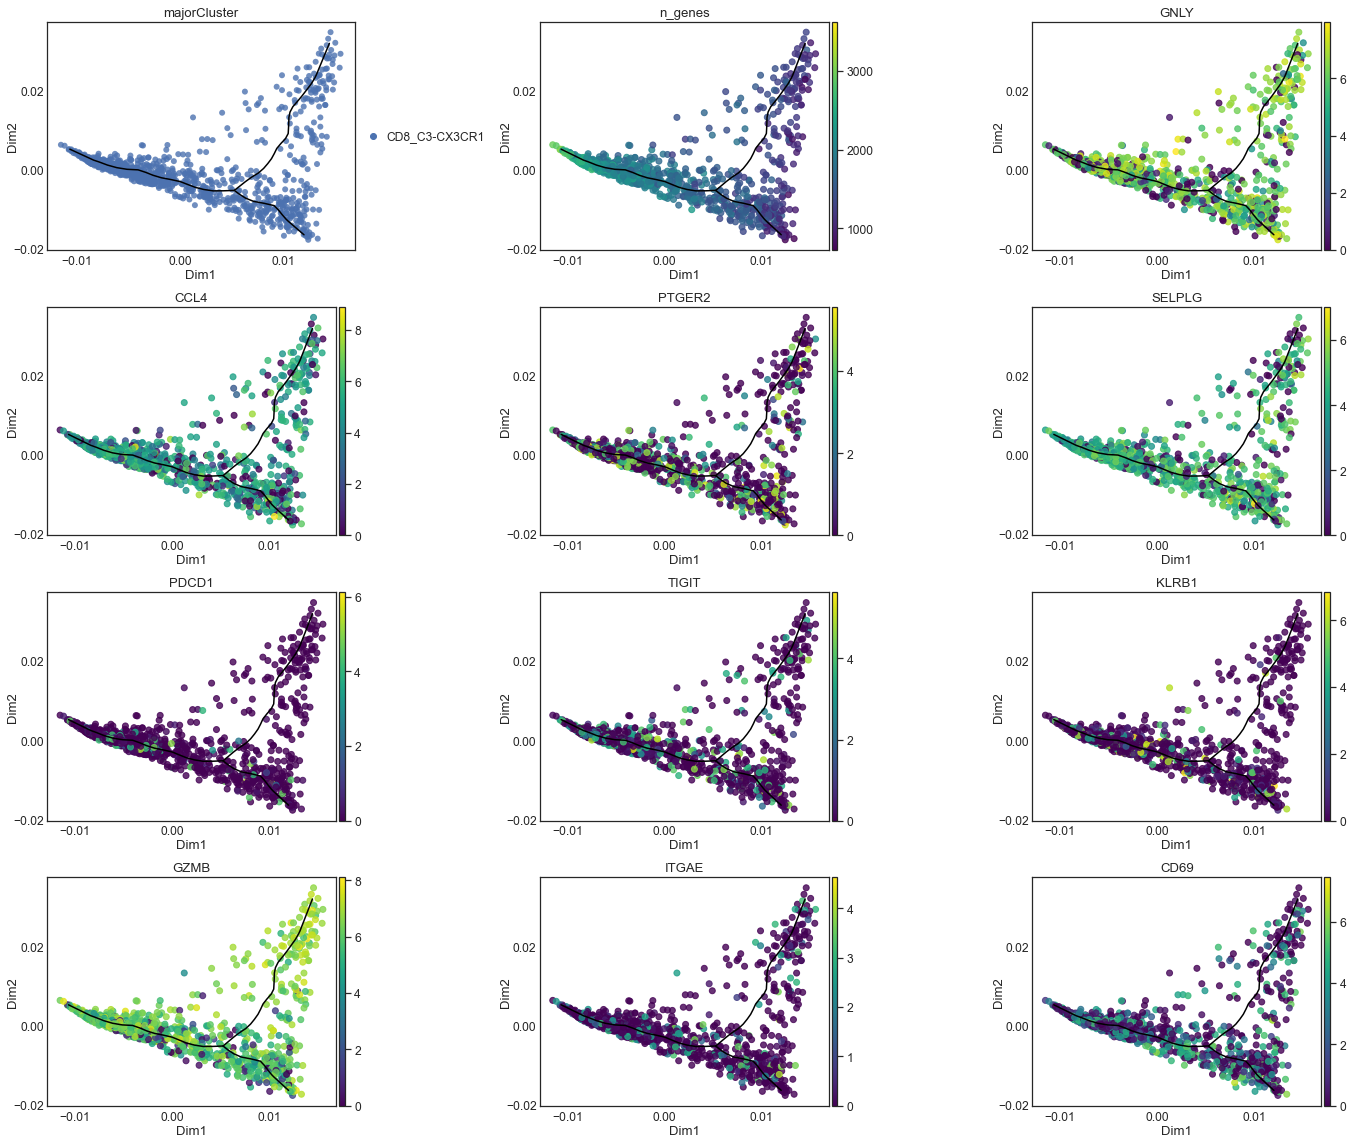

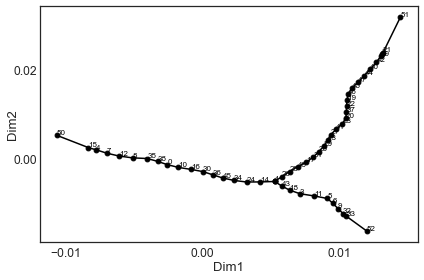

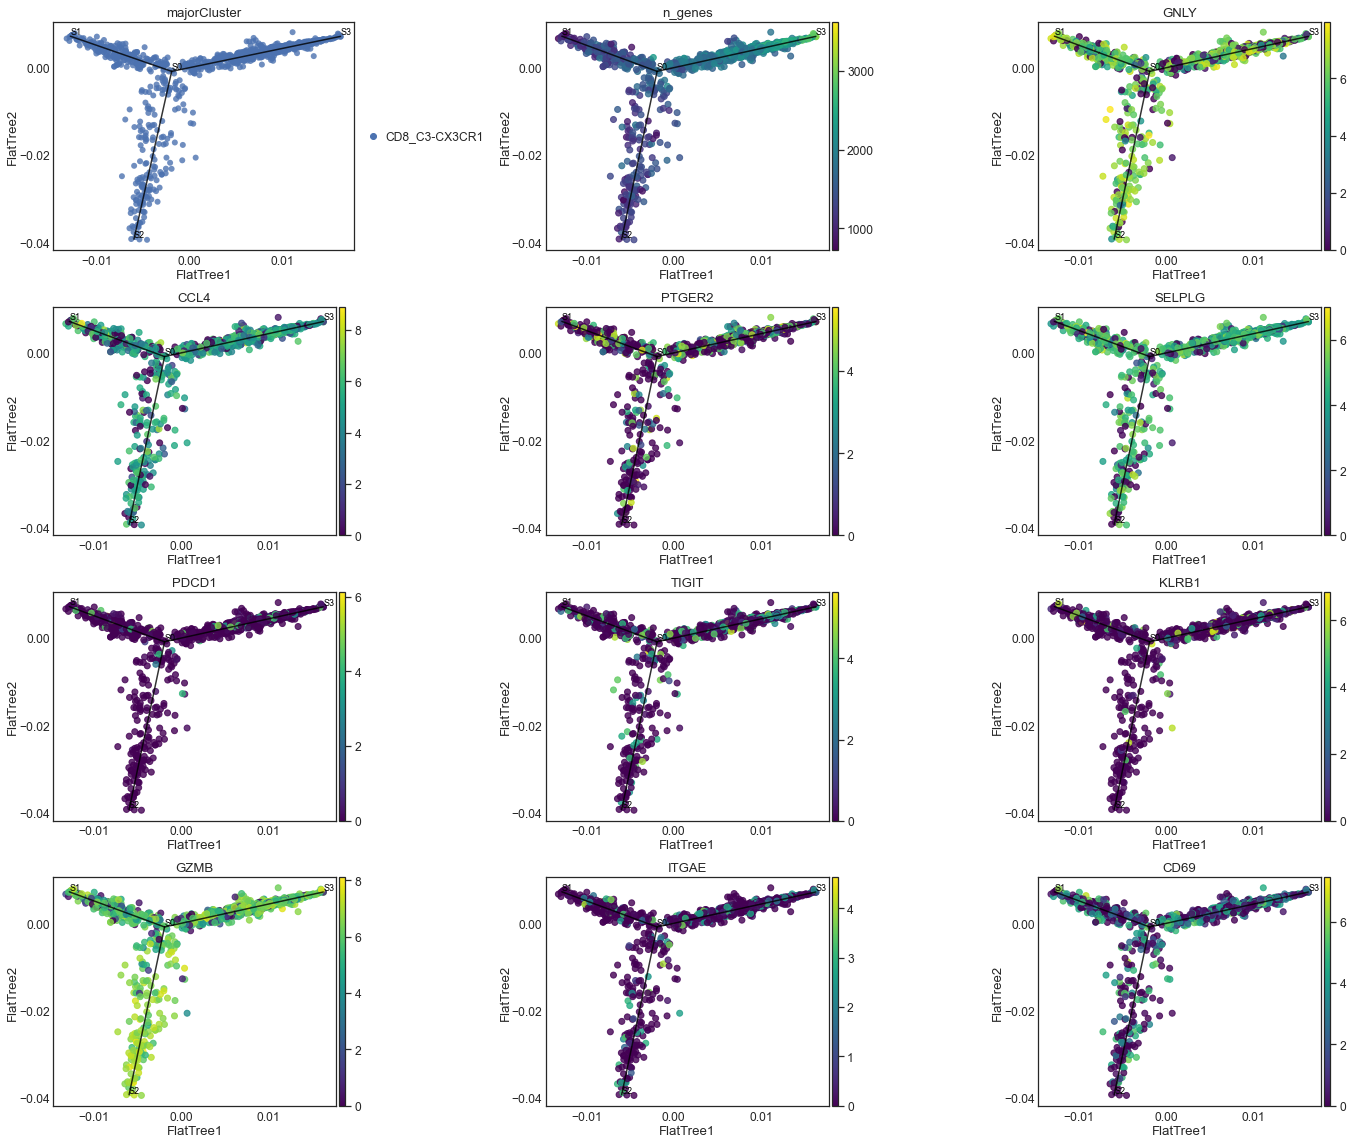

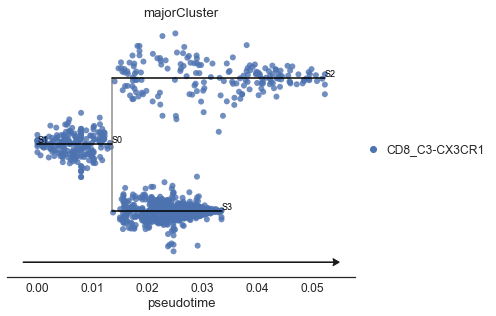

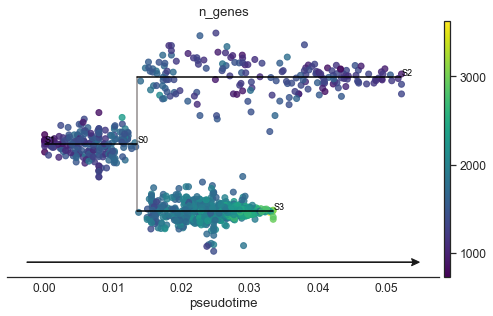

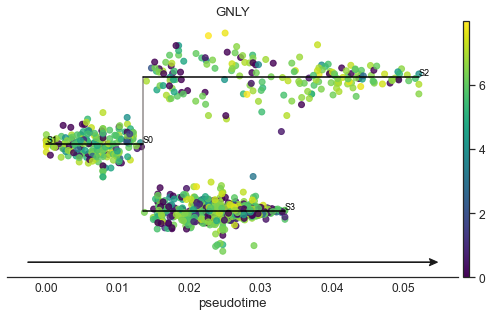

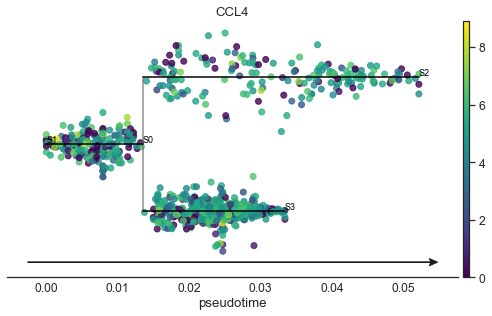

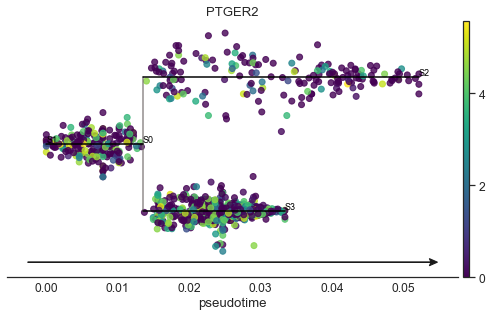

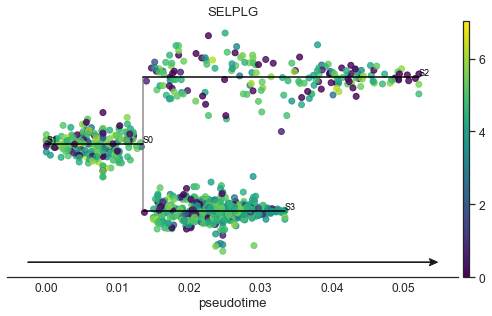

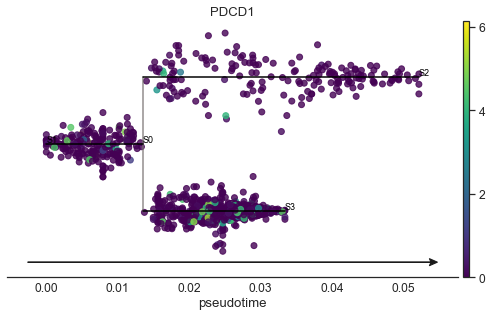

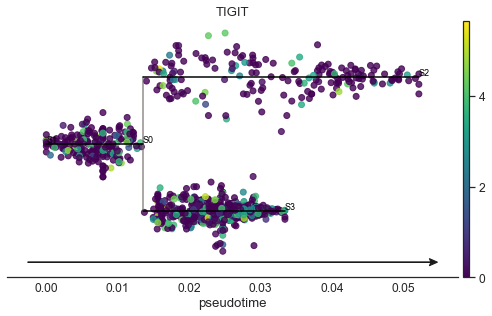

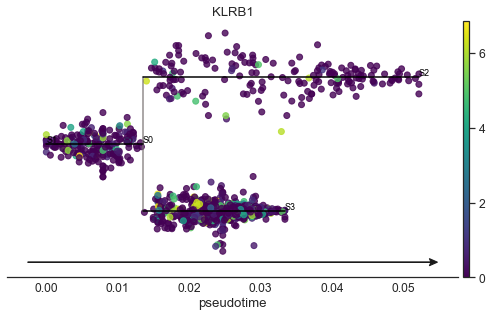

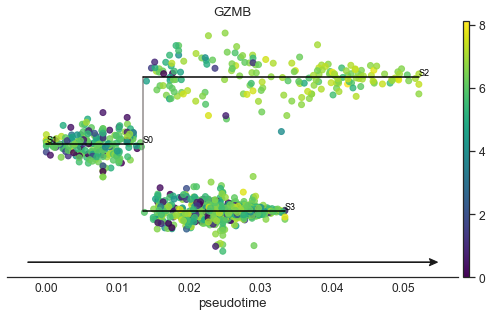

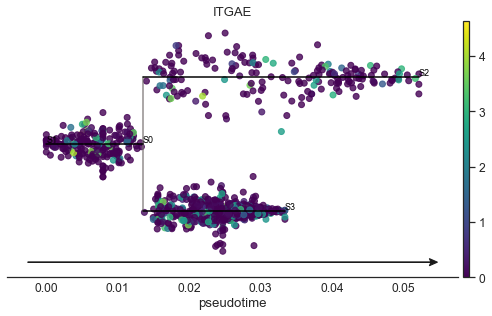

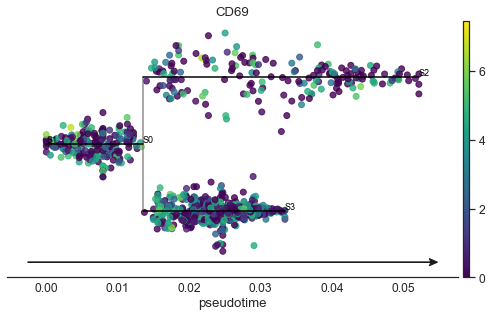

In [30]:
to_plot=['majorCluster','n_genes','GNLY',"CCL4", "PTGER2", "SELPLG", "PDCD1", "TIGIT", "KLRB1", "GZMB", "ITGAE",
        "CD69"]

## By dimension reduction
st.plot_dimension_reduction(adata,color=to_plot,
                            n_components=2,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=True)

## Trajectory: flat tree
st.plot_flat_tree(adata,color=to_plot,
                  dist_scale=0.5,show_graph=True,show_text=True)
plt.savefig(figure_dir + "/trajectory_flat.png")

## Trajectory: stream plot, single cell
st.plot_stream_sc(adata,root='S1',color=to_plot,
                  dist_scale=0.3,show_graph=True,show_text=True)
plt.savefig(figure_dir + "/stream_singlecell.png")

#### View markers

In [118]:
## marker genes for each leaf branch
adata.uns['leaf_markers_all'].loc[["GNLY"]]

,zscore,H_statistic,H_pvalue,S3S4_pvalue,S3S5_pvalue,S0S1_pvalue,S0S2_pvalue
GNLY,1.434208,49.332895,0.0,1.0,0.000054,0.0,0.0


In [119]:
## transition markers
adata.uns['transition_markers']

{('S0',
  'S3'): Empty DataFrame
 Columns: [stat, logfc, pval, qval]
 Index: [],
 ('S3',
  'S4'):             stat     logfc          pval          qval
 FCGR3A  0.517059  3.047933  3.770489e-33  4.234260e-30
 NKG7    0.492153  0.640411  9.748284e-30  5.473662e-27
 PRF1    0.477246  0.915335  7.966640e-28  2.982179e-25
 FGFBP2  0.473743  2.611271  2.173660e-27  6.102549e-25
 GZMB    0.450613  1.628908  1.237487e-24  2.779396e-22,
 ('S3',
  'S5'): Empty DataFrame
 Columns: [stat, logfc, pval, qval]
 Index: [],
 ('S0',
  'S1'): Empty DataFrame
 Columns: [stat, logfc, pval, qval]
 Index: [],
 ('S0',
  'S2'): Empty DataFrame
 Columns: [stat, logfc, pval, qval]
 Index: []}

In [87]:
## marker genes that are differentially expressed between pairs of branches
#adata.uns['de_markers_greater'][(('S3', 'S0'), ('S0', 'S1'))]
#adata.uns['de_markers_less']
adata.uns['de_markers_greater'][(('S1', 'S2'),('S1','S0'))].loc[["PTGER2", "PRF1", "GNLY", "SELPLG"]]

,z_score,U,logfc,mean_up,mean_down,pval,qval
PTGER2,9.547567,270823.0,1.665699,0.270952,0.085216,1.328878e-21,1.881691e-19
PRF1,7.982335,293027.0,0.607784,0.729941,0.478739,1.436499e-15,5.982596e-14
GNLY,4.837036,252312.0,0.736190,0.326540,0.195899,1.318327e-06,1.291408e-05
SELPLG,2.058531,234479.0,0.298272,0.506925,0.412150,3.954420e-02,6.548388e-02


In [124]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(adata.uns['de_markers_greater'][(('S0', 'S1'),
  ('S0',
   'S2'))])

            z_score        U     logfc   mean_up  mean_down          pval  \
RPL37A     5.801189  13160.5  0.389659  0.786457  0.600124   6.612500e-09   
GZMA       5.430090  12878.0  0.747973  0.676570  0.402582   5.655089e-08   
ATP5E      5.019491  12569.0  0.839033  0.592734  0.331088   5.200213e-07   
MT2A       4.289460  11765.5  1.492636  0.333371  0.118252   1.797497e-05   
LDHB       4.251343  12037.0  0.647779  0.612320  0.390599   2.131720e-05   
CD3D       4.026814  11907.0  0.292384  0.755423  0.616704   5.670815e-05   
CASP4      3.898025  11499.0  1.246418  0.329292  0.138604   9.730138e-05   
PPP1CA     3.890563  11724.0  0.739349  0.513341  0.307290   1.003140e-04   
APMAP      3.773906  11421.5  1.295562  0.308784  0.125608   1.612281e-04   
CRIP1      3.711978  11620.0  0.744168  0.504533  0.301009   2.062370e-04   
SELL       3.660152  10706.0  3.456577  0.131399  0.011849   2.531653e-04   
S100A6     3.648649  11626.0  0.397818  0.597917  0.453678   2.643548e-04   

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [125]:
adata.uns['de_markers_greater']

{(('S0', 'S3'),
  ('S0',
   'S1')):           z_score        U     logfc   mean_up  mean_down      pval      qval
 FGR      2.811057  36385.5  3.297572  0.034250  0.003452   0.004953  0.015792
 TYROBP   2.101528  36491.0  1.141421  0.063350  0.028683   0.035655  0.066134
 KLRF1    2.081214  35982.0  1.507846  0.019843  0.006965   0.037508  0.068339
 HCP5     2.074713  37514.0  0.651329  0.183186  0.116567   0.038051  0.068834
 S1PR5    2.038703  36488.0  1.152389  0.056841  0.025541   0.041547  0.073024
 CGRRF1   2.027757  36883.0  0.803424  0.097357  0.055742   0.042639  0.074135
 NCR3     2.021197  36935.0  0.738543  0.113194  0.067797   0.043312  0.074496
 RPS4Y1   1.959930  37475.0  0.516952  0.193856  0.135417   0.050050  0.083416
 TRAT1    1.919691  36630.0  0.928079  0.079766  0.041884   0.054970  0.089395
 EAPP     1.906749  36863.0  0.809321  0.116627  0.066503   0.056618  0.091059
 FCRL6    1.548567  36625.0  0.598855  0.129284  0.085319   0.121598  0.157121
 ADRB2    1.54272

### Additional info/options

#### Adjusting trajectories (optional)

* Finetune branching event:  
```python
st.optimize_branching(adata,incr_n_nodes=30)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```
* Prune trivial branches:  
```python
st.prune_elastic_principal_graph(adata,epg_collapse_mode='EdgesNumber',epg_collapse_par=2)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

* Shift branching node:  
```python
st.shift_branching(adata,epg_shift_mode='NodeDensity',epg_shift_radius=0.1,epg_shift_max=3)
st.plot_dimension_reduction(adata,show_graph=True,show_text=False)
st.plot_branches(adata,show_text=False)
```

### Additional visualization

**Some useful parameters to finetune the appearance of stream plots:**
* `dist_scale`: controls the width of STREAM plot branches.
* `factor_num_win`: controls the resolution of STREAM plot.
* `preference`: controls the order of branches
* `log_scale`: shows stream plot in log scale to zoom in on thin branches

In [ ]:
st.plot_stream(adata,root='S2',color=['GNLY'],dist_scale=0.5,factor_num_win=1.5,preference=['S0'])

In [ ]:
## Plot transition markers
st.plot_transition_markers(adata,fig_size=(10,5))

In [ ]:
## Plot markers DE between branches
st.plot_de_markers(adata)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
print(adata.uns['leaf_markers'])